# Vertical and horizontal cuts, and comparison to analytics

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import yt
##yt.mylog.setLevel()
yt.utilities.logger.disable_stream_logging()

### Some notes on lineplots from data and prescription

In [2]:
ds = yt.load("../single_level/plt0000000/") #I'd love a way to make this quiet


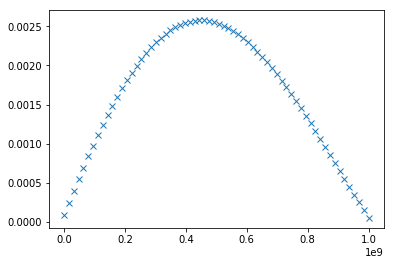

In [3]:
n = 64 # this need not be the actual number of points  - just number of sample points along the line

linbuf = yt.LineBuffer(ds,[0.,0.,0],[0.,1e9,0],n)
linedata = linbuf['rhopert'].value
y = np.linspace(0, 1e9, n)
fig = plt.figure()
ax = plt.axes()
ax.plot(y, linedata, 'x')

In [4]:
H = 1e9
# rho1  = 0.01 * linbuf['rho0'].value * np.exp(-y/(2.*H)) * np.sin(y * 2. * np.pi / H ) old
presBase = 1e13
g = 3e4 # abs val of g accn
rhoBase = presBase / H / g
rho1  = 0.01 * rhoBase * np.exp(-y/(2.*H)) * np.sin(y * 2. * np.pi / H )

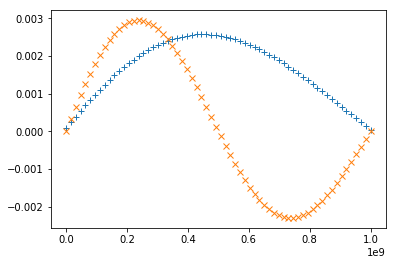

In [5]:
fig = plt.figure()
ax = plt.axes()

ax.plot(y, linedata, '+', y, rho1, 'x')


Whats the reason for the slight descrepancy? 

Perhaps just that `yt` doesn't know about the boundary conditions, so when it samples rhopert to $y=0$ (rather than $y = dy / 2 $ - the center of the frist cell), it gets it wrong.

<function ndarray.max>

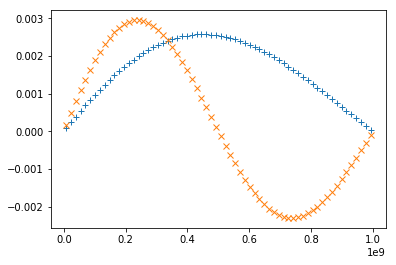

In [6]:
Ly = 1e9
n = 64 
dy = Ly / 64 # should be able to get this from the ds object somehow
y0 = dy/2 
y1 = Ly - dy/2
linbuf = yt.LineBuffer(ds,[0.,y0,0],[0.,y1,0],n)
linedata = linbuf['rhopert'].value


y = np.linspace(y0, y1, n)
H = 1e9
presBase = 1e13
g = 3e4 # abs val of g accn
rhoBase = presBase / H / g
rho1  = 0.01 * rhoBase * np.exp(-y/(2.*H)) * np.sin(y * 2. * np.pi / H )

fig = plt.figure()
ax = plt.axes()

ax.plot(y, linedata, '+', y, rho1, 'x')
rho1.max

In [7]:
print(rho1.max(), rho1.min())

0.002949612437154253 -0.002297160475812887


## Horizontal cut

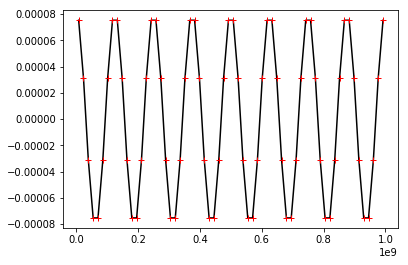

In [9]:
ds = yt.load("../single_level/plt0000000/") #I'd love a way to make this quiet
Lx = 1e9
n = 64 
dx = Lx / 64 # should be able to get this from the ds object somehow
x0 = dx/2 
x1 = Lx - dx/2
linbuf = yt.LineBuffer(ds,[x0,0,0],[x1,0,0],n)
linedata = linbuf['rhopert'].value


x = np.linspace(x0, x1, n)

fig = plt.figure()
ax = plt.axes()
ax.plot(x, linedata, 'k', x, linedata, '+r')

## Comparison in time

### Gravity wave frequency according to compressible equations

This only holds if $\omega^2 < N^2$ ?

In [ ]:
gamma = 5./3. 
g = 3e4
H = 1e9
N2 = (gamma-1.)/gamma * g / H

kv = 2. * np.pi  / H
kh = 4. * np.pi  / H

k2 = kv**2 + kh**2 
w2 = N2 * kh**2 / (k2 + (1./4./H**2) )

print(N2)
print(w2)
print(np.sqrt(w2))
P = 2.*np.pi/np.sqrt(w2)
print(P)
print(1./np.sqrt(w2))

### Full frequency according to the compressible equations

In [ ]:
gamma = 5./3. 
g = 3e4
H = 1e9
N2 = (gamma-1.)/gamma * g / H

c2 = gamma * g * H

kv = 2. * np.pi  / H
kh = 4. * np.pi  / H

k2 = kv**2 + kh**2 
w2_gw = N2 * kh**2 / (k2 + (1./4./H**2) )

w2_sw = (k2 + 1 / 4. / H**2) * c2

w2 = w2_sw / 2. * (1 - np.sqrt(1. - 4 * w2_gw / w2_sw))

print(w2)
P = 2.*np.pi/np.sqrt(w2)
print(P)

### The analytical frequency / period according to toby's work for the maestro eqn set

In [14]:
gamma = 5./3. 
g = 3e4
H = 1e9
N2 = (gamma-1.)/gamma * g / H

kv = 2. * np.pi  / H
kh = 4. * np.pi  / H

k2 = kv**2 + kh**2 
w2 = N2 * kh**2 / (k2 + ((2.-gamma)/2./gamma/H)**2 )

print(N2)
print(w2)
print(np.sqrt(w2))
P = 2.*np.pi/np.sqrt(w2)
print(P)
print(1./np.sqrt(w2))
print(np.sqrt(N2))

1.2e-05
9.599513682955626e-06
0.003098308196896433
2027.9407043732565
322.7567873982638
0.0034641016151377548


### Limiting frequency in the minimal vertical / large horizontal wavenumber case

1.2e-05


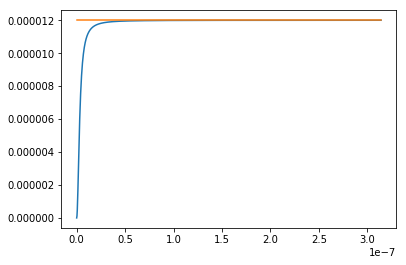

In [21]:
gamma = 5./3. 
g = 3e4
H = 1e9
N2 = (gamma-1.)/gamma * g / H
kv = 1. * np.pi  / H
kh = np.linspace(0,100,1000) * np.pi  / H
k2 = kv**2 + kh**2 
w2 = N2 * kh**2 / (k2 )
print(N2)
fig = plt.figure()
ax = plt.axes()
ax.plot(kh,w2, kh, N2+0.0*w2)


### Frequency measured at a point

In [11]:
ts = yt.load("../single_level/plt00000??/")

pointdata  = []
time = []
for ds in ts:
    pointdata.append(ds.point([0.,1e9/4,0.])['rhopert'].value[0])
    time.append(float(ds.current_time))

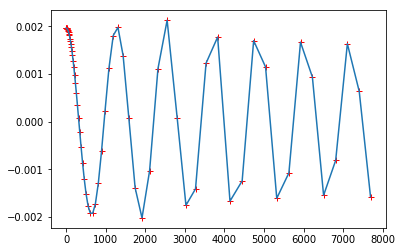

In [12]:
fig = plt.figure()
ax = plt.axes()
ax.plot(time, pointdata, '+r', time, pointdata)

#### comparison to a given period

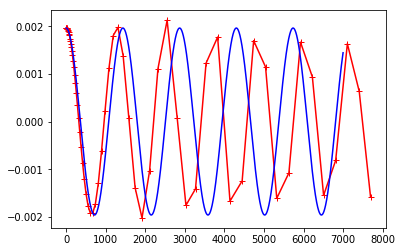

In [13]:
guess_w = 0.003098308196896433  * np.sqrt(2) # why would it be out by a factor of root 2?
smoothTime = np.linspace(0,7000,7000)
fig = plt.figure()
ax = plt.axes()
ax.plot(time, pointdata, '+r', time, pointdata, 'r', smoothTime, pointdata[0] * np.cos(-guess_w * smoothTime), 'b')

#### FFT

Could do an fft on the point data to measure $\omega$.
Complication will be the irregular sampling in time - will have to interpolate onto a uniform sampling rate first

### Frequency along a vertical cut

In [ ]:
ts = yt.load("../single_level/plt0000???/")

In [ ]:
for ds in ts:
    Ly = 1e9
    n = 64 
    dy = Ly / 64 # should be able to get this from the ds object somehow
    y0 = dy/2 
    y1 = Ly - dy/2
    linbuf = yt.LineBuffer(ds,[0.,y0,0],[0.,y1,0],n)
    linedata = linbuf['rhopert'].value


    y = np.linspace(y0, y1, n)
    H = 1e9
    presBase = 1e13
    g = 3e4 # abs val of g accn
    rhoBase = presBase / H / g
    
    rho1  = 0.01 * rhoBase * np.exp(-y/(2.*H)) * np.sin(y * 2. * np.pi / H) * np.cos( -np.sqrt(w2) * ds.current_time.value)
        
    fig = plt.figure()
    ax = plt.axes()

    ax.plot(y, linedata, '+k', y, rho1, 'xr')
    plt.title('t ={}'.format(ds.current_time))
    rho1.max